# Práctico de detección de objetos
El objetivo de este práctico es entrenar un detector de objetos en imágenes usando la red Yolo.

## Construcción del Dataset
Para el entrenamiento del detector necesitamos tener imágenes del objeto de interés y el etiquetado del mismo. Este etiquetado consiste en las coordenadas de un recuadro que indiquen donde se encuentra los objetos en las imágenes.
![alt text](https://camo.githubusercontent.com/e1e33a7ef92dfc86ab8929dd0e8e96395cbcab5c/68747470733a2f2f686162726173746f726167652e6f72672f66696c65732f3232392f6630362f3237372f32323966303632373766636334393237393334326237656466616262623437612e6a7067)
El formato de las coordenadas normalmente depende de la librería que vamos a usar. Para el caso de Yolo, el etiquetador genera un archivo `.txt` para cada imagen en el mismo directorio con el mismo nombre. El etiquetador se llama [Yolo mark](https://github.com/AlexeyAB/Yolo_mark). Para cada objeto el archivo contiene una nueva línea con el siguiente contenido: 

`<object-class> <x_center> <y_center> <width> <height>`

Donde: 
  * `<object-class>` - número entero que va de `0` to `(classes-1)`
  * `<x_center> <y_center> <width> <height>` - valores flotantes **relativos** al ancho y alto de la imagen, estos van de `(0.0 to 1.0]`
  * por ejemplo: `<x> = <absolute_x> / <image_width>` or `<height> = <absolute_height> / <image_height>`
  * `<x_center> <y_center>` - son los centros del rectángulo (no es una de las esquinas)

Cuando etiquetamos imágenes con Yolo_mark, el segundo parámetro que le pasamos es un archivo en donde se guardarán los nombres de las imágenes etiquetadas. Conservarlo porque lo usaremos más adelante para generar los archivos de entrenamiento y validación.

### Tareas para construir el dataset
 1. Buscar imágenes del objeto de interés.
 1. Etiquetar las imágenes usando Yolo_mark.
 1. Continúa más adelante


## Darknet
Para entrenar un detector de objetos basados en Yolo usaremos el framework [Darknet](https://github.com/pjreddie/darknet).

Después de descargarlo editamos el Makefile y cambiamos las primeras líneas: GPU = 1,CUDNN=1 y OPENCV=1. Con esto activamos el uso de la GPU, del módulo Deep Neural Network de cuda y el uso de opencv.

Además nos bajamos los pesos para Yolov3 preentrenados en ImageNet:
[darknet53.conv.74](https://pjreddie.com/media/files/darknet53.conv.74).
### Configuración de la Red
Crear una copia del archivo **darknet/cfg/yolov3.cfg** en **darknet/cfg/yolov3_custom.cfg**.
Modificar lo siguiente:
```
# línea 8 & 9: 
width = 416, height = 416

# línea 20 
max_batches = 6000 

# línea 22 
steps = 5400 

# línea 603, 689, 776 (convolucional anterior a capa yolo): 
filters = 18

# línea 610, 696, 783 (todas las apariciones): 
classes = 1
```
Para probar el entorno inicial se puede poner **max_batches = 10**. Esto hace que se ejecute 10 iteraciones y guarde el modelo.

En caso de que querramos detectar entre más de un objeto, hay que setear el número de **classes** y setear los filtros con la siguiente fórmula: **filters = (classes + 5)*3**.
### Configuración del dataset
Para entrenar el modelo necesitamos un conjunto de entrenamiento y un conjunto de validación.
Para esto copiamos todas las imágenes en la carpeta **darknet/data/images/**.

Y luego creamos dos archivos, **darknet/data/train.txt** y **darknet/data/val.txt**. Para esto podemos usar el archivo que genera Yolo_mark.

En estos archivos pondremos los paths relativos a las imágenes de entrenamiento y de validación. La cantidad de imágenes de entrenamiento debe ser de aproximadamente el 90%.

Ejemplo de archivo *train.txt*:
```
data/images/000001.png
data/images/000002.png
...
data/images/000090.png
```
Ejemplo de archivo *val.txt*:
```
data/images/000091.png
data/images/000002.png
...
data/images/000100.png
```

Las anotaciones **00XXXX.txt** deben guardarse en un directorio **darknet/data/labels/**.

Crear un archivo **darknet/data/yolo.names** que contenga el nombre del o los objetos a detectar uno en cada línea. El primer nombre de objeto se corresponde con el de `<object-id>` 0 del etiquetado, el segundo con el de `<object-id>` 1, y así sucesivamente.

Por último creamos el archivo **darknet/data/yolo.data** que contendrá lo siguiente:

```
classes= 1 # número de objetos
train  = data/train.txt
valid  = data/val.txt
names = data/yolo.names
backup = backup
```
En backup se guardarán los modelos entrenados. En caso de que hayamos usado otros nombres para los archivos de configuración anteriores, adaptarlos en **yolo.data**.

Por último comprimir la carpeta **darknet** y subirla a drive.

## Repaso de los pasos
 1. Construir dataset.
 1. Descargar darknet.
 1. Modificar el Makefile.
 1. Copiar yolov3.cfg y adaptarla a nuestro problema.
 1. Copiar las imágenes en **darknet/data/images**.
 1. Copiar las etiquetas en **darknet/data/images**.
 1. Crear los archivos **train.txt** y **val.txt**.
 1. Crear **yolo.names**.
 1. Crear **yolo.data**.
 1. Comprimir **darknet** y subirla a drive.

## Entrenamiento en colab
 * Montamos el drive en colab

In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 * Chequeamos que esté instalado el compilador de *cuda*

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


 * Descomprimimos el dataset



In [4]:
!unzip "/content/drive/My Drive/darknet.zip"

Archive:  /content/drive/My Drive/darknet.zip
   creating: darknet/
  inflating: darknet/darknet53.conv.74  
  inflating: darknet/.gitignore      
  inflating: darknet/Makefile        
  inflating: darknet/LICENSE         
  inflating: darknet/LICENSE.fuck    
  inflating: darknet/LICENSE.gen     
  inflating: darknet/LICENSE.gpl     
  inflating: darknet/LICENSE.meta    
  inflating: darknet/LICENSE.mit     
  inflating: darknet/LICENSE.v1      
  inflating: darknet/README.md       
   creating: darknet/cfg/
  inflating: darknet/cfg/yolov3_custom.cfg  
  inflating: darknet/cfg/alexnet.cfg  
  inflating: darknet/cfg/cifar.cfg   
  inflating: darknet/cfg/cifar.test.cfg  
  inflating: darknet/cfg/coco.data   
  inflating: darknet/cfg/combine9k.data  
  inflating: darknet/cfg/darknet.cfg  
  inflating: darknet/cfg/darknet19.cfg  
  inflating: darknet/cfg/darknet19_448.cfg  
  inflating: darknet/cfg/darknet53.cfg  
  inflating: darknet/cfg/darknet53_448.cfg  
  inflating: darknet/cfg/darkn

 * Compilamos darknet, lo hacemos ejecutable.

In [5]:
%cd /content/darknet
!make clean
!make
!chmod +x ./darknet

/content/darknet
rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o ./obj/convolutional_kernels.o ./obj/deconvolutional_kernels.o ./obj/activation_kernels.o ./obj/im2col_

 * Creamos un enlace simbólico entre colab y nuestro drive para guardar los modelos intermedios. Esto supone que existe una carpeta **colab/backup** en nuestro drive.

In [6]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet


 * Si usamos windows para generar los archivos de configuración, instalamos una utilidad para linuxearlos y se la aplicamos a los archivos. Si usan linux para generar los archivos, háganlo igual porque hace alguna magia.

In [7]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (373 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144628 files and directories curren

In [8]:
!dos2unix ./detector_data/train.txt
!dos2unix ./detector_data/val.txt
!dos2unix ./detector_data/yolo.data
!dos2unix ./detector_data/yolo.names
!dos2unix ./cfg/yolov3_custom.cfg

dos2unix: converting file ./detector_data/train.txt to Unix format...
dos2unix: converting file ./detector_data/val.txt to Unix format...
dos2unix: converting file ./detector_data/yolo.data to Unix format...
dos2unix: converting file ./detector_data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov3_custom.cfg to Unix format...


In [9]:
!ls detector_data/

images	labels	train.txt  val.txt  yolo.data  yolo.names


Si vemos algún error en la conversión, puede ser porque la pifiamos en la ubicación de los archivos. Revisarlo.


 * Entrenamos nuestro propio modelo. Esto puede tardar aproximadamente un día.

In [ ]:
%cd /content/darknet
!./darknet detector train detector_data/yolo.data cfg/yolov3_custom.cfg darknet53.conv.74
#!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg "/content/drive/My Drive/colab/backup/yolov3_custom_train_4000.weights"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000000, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.943307, Class: 0.999931, Obj: 0.998351, No Obj: 0.002325, .5R: 1.000000, .75R: 1.000000,  count: 9
Region 94 Avg IOU: 0.864099, Class: 0.999956, Obj: 0.999802, No Obj: 0.000474, .5R: 1.000000, .75R: 1.000000,  count: 6
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000000, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.941925, Class: 0.999898, Obj: 0.999950, No Obj: 0.000934, .5R: 1.000000, .75R: 1.000000,  count: 3
Region 94 Avg IOU: 0.932387, Class: 0.999897, Obj: 0.999611, No Obj: 0.004065, .5R: 1.000000, .75R: 1.000000,  count: 50
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000000, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.941547, Class: 0.999805, Obj: 0.999902, No Obj: 0.002464, .5R: 1.000000, .75R: 1.000000,  count: 9
Region 94 Avg IOU: -nan, Clas

In [10]:

%cd /content/darknet/cfg/
!ls

/content/darknet/cfg
alexnet.cfg	     imagenet1k.data		   vgg-16.cfg
cifar.cfg	     imagenet22k.dataset	   vgg-conv.cfg
cifar.test.cfg	     imagenet9k.hierarchy.dataset  voc.data
coco.data	     jnet-conv.cfg		   writing.cfg
combine9k.data	     openimages.data		   yolo9000.cfg
darknet19_448.cfg    resnet101.cfg		   yolov1.cfg
darknet19.cfg	     resnet152.cfg		   yolov1-tiny.cfg
darknet53_448.cfg    resnet18.cfg		   yolov2.cfg
darknet53.cfg	     resnet34.cfg		   yolov2-tiny.cfg
darknet9000.cfg      resnet50.cfg		   yolov2-tiny-voc.cfg
darknet.cfg	     resnext101-32x4d.cfg	   yolov2-voc.cfg
densenet201.cfg      resnext152-32x4d.cfg	   yolov3.cfg
extraction22k.cfg    resnext50.cfg		   yolov3_custom.cfg
extraction.cfg	     rnn.cfg			   yolov3-openimages.cfg
extraction.conv.cfg  rnn.train.cfg		   yolov3-spp.cfg
go.cfg		     strided.cfg		   yolov3-tiny.cfg
go.test.cfg	     t1.test.cfg		   yolov3-voc.cfg
gru.cfg		     tiny.cfg


## Probamos el modelo
1. Buscar 2 imágenes nuevas.
1. Mostrarlas en pantalla (matplotlib). 
1. Detectar objetos con nuestro modelo.
1. Mostrar el resultado de la detección.

Para este práctico pueden descargar el modelo y probarlo en sus PC.

Completar la siguiente celda con el código para realizar lo anterior.

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

W = 1024 H = 683 Canales = 3
(1, 3, 416, 416)
['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37

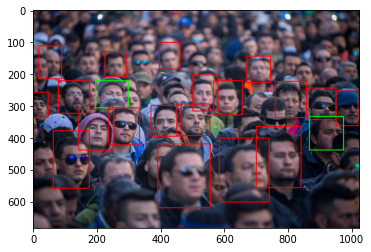

In [52]:
# Completar con el código para probar el modelo

img = mpimg.imread('/content/drive/My Drive/fotos_prueba/off05.jpg') # Esta biblioteca a diferencia de opencv deja la imagen en RGB y no en BGR

H, W, C = np.shape(img)
print('W =', W,'H =', H, 'Canales =', C)

imgplot = plt.imshow(img)

img1 = cv2.imread('/content/drive/My Drive/fotos_prueba/off05.jpg')


blob = cv2.dnn.blobFromImage(img1, 1 / 255.0, (416, 416), swapRB=True, crop=False) 

# https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
# Informally, a blob is just a (potentially collection) of image(s) with the same spatial dimensions (i.e., width and height),
# same depth (number of channels), that have all be preprocessed in the same manner.
# En este caso una sola imagen

print(np.shape(blob))

ConfigPath = '/content/darknet/cfg/yolov3_custom.cfg'
WeightsPath = '/content/drive/My Drive/backup/yolov3_custom_final.weights'

net = cv2.dnn.readNetFromDarknet(ConfigPath, WeightsPath)

boxes = []               # Donde se guardaran las bounding boxes
confidences = []         # Donde se guardaran la probabilidades de clase mas alta de cada bounding box
classIDs = []            # Donde se guadaran las identidades de clases, indicara a que clase corresponde el valor de confidences. Ej: 0 --> TapaBocaON , 1 --> TapaBocaOFF

#modelo_detector = cv2.dnn_DetectionModel(ConfigPath, WeightsPath)
#classIds, confidences, boxes = modelo_detector.detect(img2)
#print(classIds)

ln = net.getLayerNames() # ln(layer names) es un arreglo de strings, donde cada string guarda el nombre de una capa de la red
print(ln)                # ejemplo 'conv_0', 'relu_1', 

# Las capas de YOLO son capas de salida y por lo tanto son capas no conectadas a el metodo 'forward' de nuestra clase net
# Necesitamos pasarle los nombres de las capas que queremos de salida, en caso de que no le pasemos estos hará pasar la imagen
# hasta el final, en nuestro caso tenemos 3 capas de yolo las cuales son: yolo_82, yolo_94, yolo_106

ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]  # getUnconnectedOutLayers()---> Returns indexes of layers with unconnected outputs,
                                                            # Lo unico empeza desde el 1, no del cero por ende al indice que entrega hay que restarle 1
                                                            # En este caso devuelve un arreglo con 3 indices, i[0] representa el primer indice para yolo_82
print(ln)

net.setInput(blob)                      # Sets the new input value for the network, espera recibir un blob
layerOutputs = net.forward(ln)           # Hace pasar el blob de entrada por toda la red hasta las capas de salida, las cuales(capas de salida) 
                                         # debemos indicarle sus nombres como parametro, en este caso le indicamos 3 capas: yolo_82, yolo_94, yolo_106
                                         # con el arreglo ln que contiene los 3 nombres

# layerOutputs es un tensor el cual tendra 3 matrices, 1 por cada capa de salida yolo,
# cada matriz tendrá un numero de filas diferentes, en particular yolo_82 --> 507 filas, yolo_94 --> 2028, yolo_106 --> 8112
# pero todas estas filas tendran en comun el numero de columnas que seran 7 (de la 0 a la 6 en indices)

# Cada fila de la cada salida yolo(matriz) seria una bounding box de una region de alguna celda dentro de la imagen

# Donde 0 --> posicion x central de la Bounding Box
#       1 --> posicion y central de la Bounding Box
#       2 --> width              de la Bounding Box
#       3 --> height             de la Bounding Box
#       4 --> probabilidad de que haya un objeto
#       5 --> probabilidad clase 0 : TapaBocaON
#       6 --> probabilidad clase 1 : TapaBocaOFF

for matrix in layerOutputs:     # Para sacar cada salida yolo
    for fila in matrix:          # Saca cada fila de la matriz para luego poder analizarla y filtrar las que contengan objeto
        
        scores = fila[5:]                 # scores guarda solamente las probabilidades de clases por eso parte del elemento 5 hasta el final
        classID = np.argmax(scores)       # argmax guarda el indice donde scores es mayor, es decir el indice de la mayor probabilidad de clase
        confidence = scores[classID]      # una vez con el indice guardamos la mayor probabilidad en confidence

# Como la gran mayoria de los valores de scores van a ser cero los filtramos y solo nos quedamos con los que confidence > 0.5

        if (confidence > 0.5):
            box = fila[0:4] * np.array([W, H, W, H]) # se multiplica x, y, w, h, que estan normalizados por el ancho y alto verdadero de la imagen
            (centerX, centerY, width, height) = [int(box[0]), int(box[1]), int(box[2]), int(box[3])] 

            # El recuadro para detectar el objeto visualmente se dibujará con el metodo cv2.rectangle() al cual hay que pasarle
            # en vez del punto en el centro, el punto de la esquina superior izquierda y el punto de la esquina inferior derecha
            # por lo que se recalcula x1, y1

            x1 = int(centerX - (width / 2))
            y1 = int(centerY - (height / 2))
            pt1 = (x1, y1)
            x2 = int(x1 + width)
            y2 = int(y1 + height)
            pt2 = (x2, y2)

            boxes.append([x1, y1, int(width), int(height)])    # Se guarda cada bounding box
            confidences.append(float(confidence))              # Se guarda las confidencias
            classIDs.append(classID)                           # Se guarda a que clase pertenece 0 --> TapaBocaON ; 1 --> TapaBocaOFF

            #if (classID == 0):
             #   color = (0, 255, 0)            
            #else:
             #   color = (255, 0, 0)

            #cv2.rectangle(img, pt1, pt2, color, 2)


max_obj = np.shape(classIDs)
for i in range(0, max_obj[0]):
    
    if (classIDs[i] == 0):
        color1 = (0, 255, 0)            
    else:
        color1 = (255, 0, 0)
    
    cv2.rectangle(img,(boxes[i][0], boxes[i][1]), ((boxes[i][0] + boxes[i][2]), (boxes[i][1] + boxes[i][3])), color1, 2)

imgplot2 = plt.imshow(img)

print('boxes: ', boxes)
print('confidences: ', confidences)
print('classIDs: ', classIDs)

